In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashfakyeafi/cat-dog-images-for-classification")


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split



In [3]:
# Load the CSV file
csv_file = '/kaggle/input/cat-dog-images-for-classification/cat_dog.csv'
data = pd.read_csv(csv_file)

# Inspect the CSV
print(data.head())


           image  labels
0  dog.11289.jpg       1
1  cat.10836.jpg       0
2   cat.7970.jpg       0
3   cat.2212.jpg       0
4   dog.2653.jpg       1


In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_image(image_path, target_size=(64, 64)):
    image = load_img(image_path, target_size=target_size)  # Load image
    image = img_to_array(image)  # Convert to array
    image = image / 255.0  # Normalize to [0, 1]
    return image


In [5]:
# Set image directory path and label mappings
image_dir = '/kaggle/input/cat-dog-images-for-classification/cat_dog'
labels = {'cat': 0, 'dog': 1} 

# Add the full image path to the dataframe
data['image_path'] = data['image'].apply(lambda x: os.path.join(image_dir, x))

# Load images and labels
X = np.array([load_and_preprocess_image(img_path) for img_path in data['image_path']])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, np.array(data['labels']), test_size=0.2, random_state=42)


In [7]:
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=HeNormal(), input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # Flatten the output
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(1, activation='sigmoid'))  # Binary classification (cat vs dog)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),, loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Use ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    validation_data=(X_test, y_test), 
                    epochs=10)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.7014 - loss: 0.5700 - val_accuracy: 0.7244 - val_loss: 0.5575
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - accuracy: 0.7185 - loss: 0.5495 - val_accuracy: 0.7692 - val_loss: 0.4837
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 112ms/step - accuracy: 0.7395 - loss: 0.5259 - val_accuracy: 0.7428 - val_loss: 0.5361
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 112ms/step - accuracy: 0.7457 - loss: 0.5158 - val_accuracy: 0.7874 - val_loss: 0.4520
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 112ms/step - accuracy: 0.7520 - loss: 0.5125 - val_accuracy: 0.7944 - val_loss: 0.4378
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 112ms/step - accuracy: 0.7594 - loss: 0.4936 - val_accuracy: 0.8016 - val_loss: 0.4260
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 112ms/step - accuracy: 0.7649 - loss: 0.4888 - val_accuracy: 0.7898 - val_loss: 0.4612
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 112ms/step - accuracy: 0.7735 - loss: 0

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7483 - loss: 0.5126
Test Accuracy: 75.24%


In [22]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])

[0.7073000073432922, 0.7212499976158142, 0.7401999831199646, 0.7454000115394592, 0.7556999921798706, 0.7621999979019165, 0.7663999795913696, 0.7720500230789185, 0.7737500071525574, 0.7806000113487244]
[0.724399983882904, 0.7692000269889832, 0.7427999973297119, 0.7874000072479248, 0.7943999767303467, 0.8015999794006348, 0.7897999882698059, 0.803600013256073, 0.7838000059127808, 0.7523999810218811]


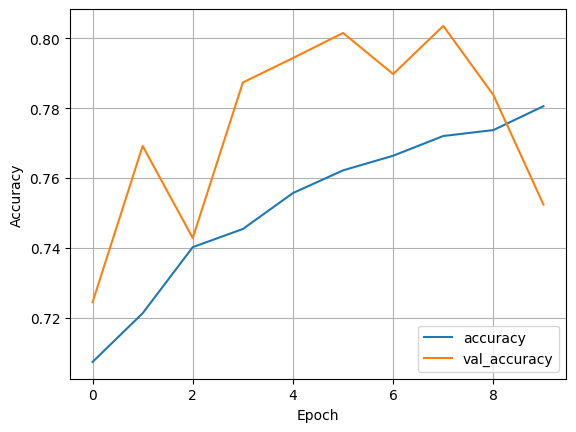

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [29]:
img_path = '/kaggle/input/dog-cat/cat1.png'
img = load_and_preprocess_image(img_path)
img = np.expand_dims(img, axis=0)  # Add batch dimension
prediction = model.predict(img)
print(prediction)

if prediction > 0.5:
    print("It's a Dog!")
else:
    print("It's a Cat!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.6049684]]
It's a Dog!
